In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import pickle


In [4]:
df=pd.read_csv('/content/drive/MyDrive/goodreads_data.csv')

In [5]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [6]:
df['Author'].value_counts()

,count
Author,
Stephen King,57
William Shakespeare,39
Terry Pratchett,35
Agatha Christie,33
Anonymous,28
...,...
Tamara Philip,1
Jayde Scott,1
Livia Bitton-Jackson,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


Cleaning The data

In [9]:
df.drop(columns=['Unnamed: 0','URL'],inplace=True)


In [10]:
df.isnull().sum()

,0
Book,0
Author,0
Description,77
Genres,0
Avg_Rating,0
Num_Ratings,0


In [11]:
df['Description']=df['Description'].fillna(df['Description'].mode()[0])

In [12]:
df.isnull().sum()

,0
Book,0
Author,0
Description,0
Genres,0
Avg_Rating,0
Num_Ratings,0


In [13]:
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '').astype(float)#removing commas and converting to float num ratings column

In [14]:


import pandas as pd
from sklearn.preprocessing import OneHotEncoder



# Creating a OneHotEncoder object
enc = OneHotEncoder(sparse_output=False) # Set sparse_output to False
# or
#enc = OneHotEncoder()
author_encoded = enc.fit_transform(df[['Author']])
# Convert the encoded features to a DataFrame
author_encoded_df = pd.DataFrame(author_encoded, columns=enc.get_feature_names_out(['Author']))

# Concatenate the encoded features with the original DataFrame

In [37]:
# prompt: save this encoder used for author above using pickle

import pickle

# Assuming 'enc' is your fitted OneHotEncoder object from the previous code
with open('author_encoder.pkl','wb') as f:
  pickle.dump(enc,f)


In [15]:
author_encoded_df

,Author_A. Giacomi,Author_A. Meredith Walters,Author_A.A. Milne,Author_A.B. McKinley,Author_A.B. Shepherd,Author_A.C. Weisbecker,Author_A.D. Justice,Author_A.D. Zoltan,Author_A.D.T. McLellan,Author_A.E. Nasr,...,Author_فاروق جويدة,Author_محمد الغزالي,Author_محمد المنسي قنديل,Author_محمد بن إدريس الشافعي,Author_محمد سالم عبادة,Author_محمد عبد الرحمن العريفي,Author_مصطفى محمود,Author_نزار قباني,Author_وائل رداد,Author_ياسر حارب
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df1=df.copy()

In [17]:
import ast

df['Genres'] = df['Genres'].apply(ast.literal_eval)
df['Genres']

,Genres
0,"[Classics, Fiction, Historical Fiction, School..."
1,"[Fantasy, Fiction, Young Adult, Magic, Childre..."
2,"[Classics, Fiction, Romance, Historical Fictio..."
3,"[Classics, Nonfiction, History, Biography, Mem..."
4,"[Classics, Fiction, Dystopia, Fantasy, Politic..."
...,...
9995,"[Dystopia, Science Fiction, Post Apocalyptic, ..."
9996,[]
9997,"[Fiction, Horror, Dystopia, Coming Of Age]"
9998,"[New Adult, Romance, Contemporary Romance, Con..."


In [18]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the genres into a binary matrix
genres_encoded = pd.DataFrame(mlb.fit_transform(df['Genres']), columns=mlb.classes_)

# Add the prefix 'genre_' to all column names
genres_encoded = genres_encoded.add_prefix('genre_')

# Combine with original DataFrame (if needed)
# ...

In [38]:
with open('genres_encoder.pkl','wb') as f:
  pickle.dump(mlb,f)

In [19]:
genres_encoded.columns

Index(['genre_12th Century', 'genre_15th Century', 'genre_16th Century',
       'genre_17th Century', 'genre_18th Century', 'genre_19th Century',
       'genre_20th Century', 'genre_21st Century', 'genre_Abuse',
       'genre_Academia',
       ...
       'genre_Writing', 'genre_Young Adult', 'genre_Young Adult Contemporary',
       'genre_Young Adult Fantasy', 'genre_Young Adult Paranormal',
       'genre_Young Adult Romance', 'genre_Young Readers', 'genre_Zen',
       'genre_Zimbabwe', 'genre_Zombies'],
      dtype='object', length=617)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Avg_Rating'] = scaler.fit_transform(df[['Avg_Rating']])


In [39]:
with open('avg_rating_encoder.pkl','wb') as f:
  pickle.dump(scaler,f)


In [21]:
feature_matrix = pd.concat([genres_encoded,author_encoded_df , df[['Avg_Rating','Book']]], axis=1)

In [22]:
feature_matrix.head()

,genre_12th Century,genre_15th Century,genre_16th Century,genre_17th Century,genre_18th Century,genre_19th Century,genre_20th Century,genre_21st Century,genre_Abuse,genre_Academia,...,Author_محمد المنسي قنديل,Author_محمد بن إدريس الشافعي,Author_محمد سالم عبادة,Author_محمد عبد الرحمن العريفي,Author_مصطفى محمود,Author_نزار قباني,Author_وائل رداد,Author_ياسر حارب,Avg_Rating,Book
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.854,To Kill a Mockingbird
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894,Harry Potter and the Philosopher’s Stone (Harr...
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856,Pride and Prejudice
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.836,The Diary of a Young Girl
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796,Animal Farm


In [23]:
feature_matrix1=feature_matrix.copy()

In [24]:
feature_matrix.drop(columns=['Book'],axis=1,inplace=True)

In [25]:
feature_matrix1.columns

Index(['genre_12th Century', 'genre_15th Century', 'genre_16th Century',
       'genre_17th Century', 'genre_18th Century', 'genre_19th Century',
       'genre_20th Century', 'genre_21st Century', 'genre_Abuse',
       'genre_Academia',
       ...
       'Author_محمد المنسي قنديل', 'Author_محمد بن إدريس الشافعي',
       'Author_محمد سالم عبادة', 'Author_محمد عبد الرحمن العريفي',
       'Author_مصطفى محمود', 'Author_نزار قباني', 'Author_وائل رداد',
       'Author_ياسر حارب', 'Avg_Rating', 'Book'],
      dtype='object', length=6683)

In [26]:
# prompt: apply dimensionality reduction techniques on feature_mattrix1 like pca or tcne the one whic is best according the the feature_matrix1

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming 'feature_matrix1' is defined as in your previous code

# Separate features and target variable (if applicable)
X = feature_matrix # Drop 'Book' if exists

# Scale the features


# Apply PCA
pca = PCA(n_components=2) # Keep components explaining 95% of variance
X_pca = pca.fit_transform(X)
explained_variance_pca = pca.explained_variance_ratio_.sum()

# Apply t-SNE
# Reduce to 2 dimensions
#X_tsne = tsne.fit_transform(X) #Original line
#Instead of using transform separately, fit_transform should be used directly in the recommend_books function.
#So, removed the fit_transform here.



# Evaluate and compare
#print(f"PCA explained variance: {explained_variance_pca}")
# Further analysis or visualization of PCA and t-SNE results
'''
# Determine the best method based on your evaluation criteria
# For example, if you prioritize preserving variance, and PCA
# explains sufficient variance, then use PCA
if explained_variance_pca > 0.90:  # Or another threshold
    print("PCA is the preferred method.")
    feature_matrix1_reduced = pd.DataFrame(X_pca)
else:
  '''

feature_matrix1_reduced = pd.DataFrame(X_pca) #Apply fit_transform here to initialize the reduced matrix

#Now feature_matrix1_reduced contains the dimensionality-reduced data
print(feature_matrix1_reduced.head())
print(print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}"))

          0         1
0  0.824887 -0.659664
1  0.861099 -0.851955
2  0.759477 -0.375146
3 -1.132312 -0.283237
4  0.626647 -0.623765
Explained Variance Ratio: [0.09607701 0.05222099]
None


In [40]:
with open('pca_applied.pkl','wb') as f:
  pickle.dump(pca,f)


In [27]:
feature_matrix1_reduced.columns=feature_matrix1_reduced.columns.astype(str)


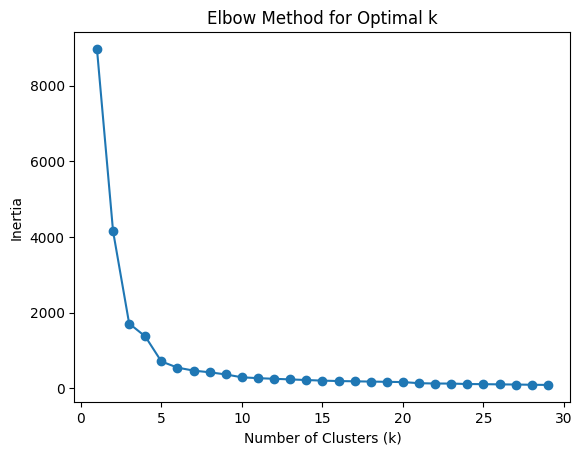

In [28]:
# prompt: now write code to apply clustering on feature_matrix1_reduced  and also find the optimal number of clusters using elbow method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering for different numbers of clusters
inertia = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(feature_matrix1_reduced)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 30), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Determine the optimal number of clusters (k) based on the elbow point
# In the elbow method, you visually inspect the plot and choose the k where
# the inertia starts to decrease less rapidly (the "elbow" point).

# Example (replace with your chosen k based on the plot):


In [29]:
optimal_k = 5 # Example optimal k value. Change based on the elbow graph.
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(feature_matrix1_reduced)

# Add the cluster labels to the DataFrame if needed
feature_matrix1_reduced['cluster'] = clusters

print(feature_matrix1_reduced.head())

          0         1  cluster
0  0.824887 -0.659664        3
1  0.861099 -0.851955        3
2  0.759477 -0.375146        3
3 -1.132312 -0.283237        0
4  0.626647 -0.623765        3


In [41]:
with open('kmean_applied.pkl','wb') as f:
  pickle.dump(kmeans_optimal,f)


In [30]:
feature_matrix1_reduced['cluster'].value_counts()

,count
cluster,
3,3241
0,2303
4,1837
1,1720
2,899


In [51]:
with open('feature_matrix1.pkl','wb') as f:
    enc1=pickle. dump(feature_matrix1,f)
with open('feature_matrix1_reduced.pkl','wb') as f:
    enc1=pickle. dump(feature_matrix1_reduced,f)

In [54]:
def load_obj():
  with open('author_encoder.pkl','rb') as f:
    enc1=pickle.load(f)
  with open('genres_encoder.pkl','rb') as f:
    mlb1=pickle.load(f)
  with open('avg_rating_encoder.pkl','rb') as f:
    scaler1=pickle.load(f)
  with open('pca_applied.pkl','rb') as f:
    pca1=pickle.load(f)
  with open('kmean_applied.pkl','rb') as f:
    kmeans_optimal1=pickle.load(f)
  with open('feature_matrix1.pkl','rb') as f:
    feature_matrix11=pickle.load(f)
  with open('feature_matrix1_reduced.pkl','rb') as f:
    feature_matrix11_reduced=pickle.load(f)
  return enc1,mlb1,scaler1,pca1,kmeans_optimal1,feature_matrix11,feature_matrix11_reduced

In [55]:
# prompt: now generate a recomendation function for this model which will take author(encode it on the encoder used during training),genre(encodeit),avg_rating scale it in simple look athe code before and generate a recomendation function

import pandas as pd
import numpy as np

def recommend_books(author, genre, avg_rating, num_recommendations=5):
    """
    Recommends books based on author, genre, and average rating.

    Args:
        author: The author of the book.
        genre: The genre of the book.
        avg_rating: The average rating of the book.
        num_recommendations: The number of recommendations to return.

    Returns:
        A list of recommended book titles.
    """

    # 1. Data Preprocessing
    # Assuming the necessary preprocessing steps (OneHotEncoding, MultiLabelBinarizer, MinMaxScaler, TSNE)
    # have already been performed and the 'feature_matrix1_reduced' DataFrame with 'cluster' column is available

    # 2. Encode input author and genre using the same encoder objects
    enc1,mlb1,scaler1,pca1,kmeans_optimal1,feature_matrix11,feature_matrix11_reduced=load_obj()
    try:
        author_encoded = enc1.transform([[author]])  # Use the same encoder used earlier
    except ValueError:
        print(f"Warning: Author '{author}' not found in training data. Using a zero-vector")
        author_encoded = np.zeros((1, author_encoded_df.shape[1])) # Using a zero vector

    try:
        genre_encoded = mlb1.transform([[genre]])
        genre_encoded = pd.DataFrame(genre_encoded, columns=mlb.classes_).add_prefix('genre_')
    except ValueError:
        print(f"Warning: Genre '{genre}' not found in training data. Using a zero-vector")
        genre_encoded = pd.DataFrame(np.zeros((1, len(mlb.classes_))), columns=mlb.classes_).add_prefix('genre_')


    # Scale the avg_rating using the same scaler
    avg_rating_scaled = scaler1.transform([[avg_rating]])


    # Combine the encoded features
    input_features = np.concatenate([genre_encoded.values, author_encoded, avg_rating_scaled], axis=1)

    # 3. Dimensionality Reduction
    input_features_reduced =pca1.transform(input_features)


    # 4. Find the cluster
    input_cluster = kmeans_optimal1.predict(input_features_reduced)


    # 5. Get recommendations from the same cluster
    recommended_books = feature_matrix11[feature_matrix11_reduced['cluster'] == input_cluster[0]]
    recommended_books = recommended_books.sample(num_recommendations)['Book'].tolist()

    return recommended_books

In [56]:
author_name = "Stephen King"
preferred_genres = "Fiction,Horror"
minimum_rating = 4
recommend_books(author_name,preferred_genres,minimum_rating)

['Touching the moon',
 'Five Years - The Meeting',
 'The Vision of the Evening and the Morning',
 'Imitating Humans: A Technical Approach',
 'Brave Brush-Tail Possum']

In [57]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_pca, kmeans_optimal.labels_)

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5681112566123876


In [77]:
# prompt: this way i am talking about %%writefile app.py
# import streamlit as st
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# import pickle
# import os
# # Paths to your saved model and encoders (adjust these to match your local paths)
# MODEL_PATH = '/content/model1.keras'
# ENCODERS_PATH ='/content/label_encoders.pkl'
# def load_saved_model_and_encoders():
#     # Load the pre-trained model
#     model = load_model(MODEL_PATH)
#     # Load label encoders
#     with open(ENCODERS_PATH, 'rb') as file:
#         label_encoders = pickle.load(file)
#     return model, label_encoders
# def predict_survival(model, input_data, label_encoders):
#     # Transform categorical features using saved encoders
#     categorical_columns = ['sex', 'class', 'who', 'embark_town', 'alive', 'alone', 'adult_male']
#     for column in categorical_columns:
#         value = str(input_data[column].iloc[0]).strip() # Clean input value
#         if value not in label_encoders[column].classes_:
#             st.write((label_encoders[column].classes_))
#             st.error(f"Unexpected value in column '{column}': {value}. Using a default category.")
#             # Assign a default value (e.g., the first class in the encoder)
#             value = label_encoders[column].classes_[0]
#         # Transform the cleaned value
#         input_data[column] = label_encoders[column].transform([value])[0]
#     # Predict
#     #input_data = input_data # Ensure numerical format for the model
#     prediction = model.predict(input_data)
#     survival_prob = prediction
#     return survival_prob
# def main():
#     st.title('Titanic Survival Prediction')
#     # Load saved model and encoders
#     try:
#         model, label_encoders = load_saved_model_and_encoders()
#     except Exception as e:
#         st.error(f"Error loading model: {e}")
#         return
#     # Sidebar for input
#     st.sidebar.header('Passenger Details')
#     # Create input widgets for each

%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import ast

# Load necessary objects (encoders, scalers, models, etc.)
def load_obj():
    with open('author_encoder.pkl','rb') as f:
        enc1=pickle.load(f)
    with open('genres_encoder.pkl','rb') as f:
        mlb1=pickle.load(f)
    with open('avg_rating_encoder.pkl','rb') as f:
        scaler1=pickle.load(f)
    with open('pca_applied.pkl','rb') as f:
        pca1=pickle.load(f)
    with open('kmean_applied.pkl','rb') as f:
        kmeans_optimal1=pickle.load(f)
    with open('feature_matrix1.pkl','rb') as f:
        feature_matrix11=pickle.load(f)
    with open('feature_matrix1_reduced.pkl','rb') as f:
        feature_matrix11_reduced=pickle.load(f)
    return enc1,mlb1,scaler1,pca1,kmeans_optimal1,feature_matrix11,feature_matrix11_reduced

def recommend_books(author, genre, avg_rating, num_recommendations=5):
    enc1,mlb1,scaler1,pca1,kmeans_optimal1,feature_matrix11,feature_matrix11_reduced=load_obj()
    try:
        author_encoded = enc1.transform([[author]])
    except ValueError:
        st.warning(f"Warning: Author '{author}' not found in training data. Using a default category.")
        author_encoded = np.zeros((1, len(enc1.categories_[0]))) # Default to a zero vector

    try:
        genre_encoded = mlb1.transform([[genre]])
        genre_encoded = pd.DataFrame(genre_encoded, columns=mlb1.classes_).add_prefix('genre_')
    except ValueError:
        st.warning(f"Warning: Genre '{genre}' not found in training data. Using a default category.")
        genre_encoded = pd.DataFrame(np.zeros((1, len(mlb1.classes_))), columns=mlb1.classes_).add_prefix('genre_')

    avg_rating_scaled = scaler1.transform([[avg_rating]])

    input_features = np.concatenate([genre_encoded.values, author_encoded, avg_rating_scaled], axis=1)
    input_features_reduced = pca1.transform(input_features)

    input_cluster = kmeans_optimal1.predict(input_features_reduced)
    recommended_books = feature_matrix11[feature_matrix11_reduced['cluster'] == input_cluster[0]]
    recommended_books = recommended_books.sample(num_recommendations)['Book'].tolist()

    return recommended_books

def main():
    st.title('Book Recommendation App')

    author_name = st.text_input("Enter Author Name:")
    preferred_genres = st.text_input("Enter Preferred Genres (comma-separated):")
    minimum_rating = st.slider("Enter Minimum Average Rating", 0.0, 5.0, 3.0, step=0.1)

    if st.button("Recommend Books"):
        if author_name and preferred_genres:
            recommendations = recommend_books(author_name, preferred_genres, minimum_rating)
            st.write("Recommended Books:")
            for book in recommendations:
                st.write(book)
        else:
            st.warning("Please provide both author and genre information")


if __name__ == '__main__':
    main()

Overwriting app.py


In [83]:
from pyngrok import ngrok

# Set your Ngrok authtoken (replace 'your_auth_token' with the copied token)
ngrok.set_auth_token('2bOYa4qRr7z4K3HOLkfhBIJgRPB_5Th4f73XnfSqFC8oG4o8S')

# Set up the Ngrok tunnel to the Streamlit app
# The port number should be included in the 'addr' argument
public_url = ngrok.connect(addr='http://localhost:8501')
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://1387-34-169-105-162.ngrok-free.app" -> "http://localhost:8501"


In [84]:
!streamlit run app.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.105.162:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['horror'] will be ignored
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid featur